# Edge Detection

<br></br>

Edges in an image function is a place of rapid changes in the intensity
function.

In [244]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.filters import gaussian
from skimage.feature import canny 
from skimage.color import rgb2gray
from scipy.signal import correlate2d


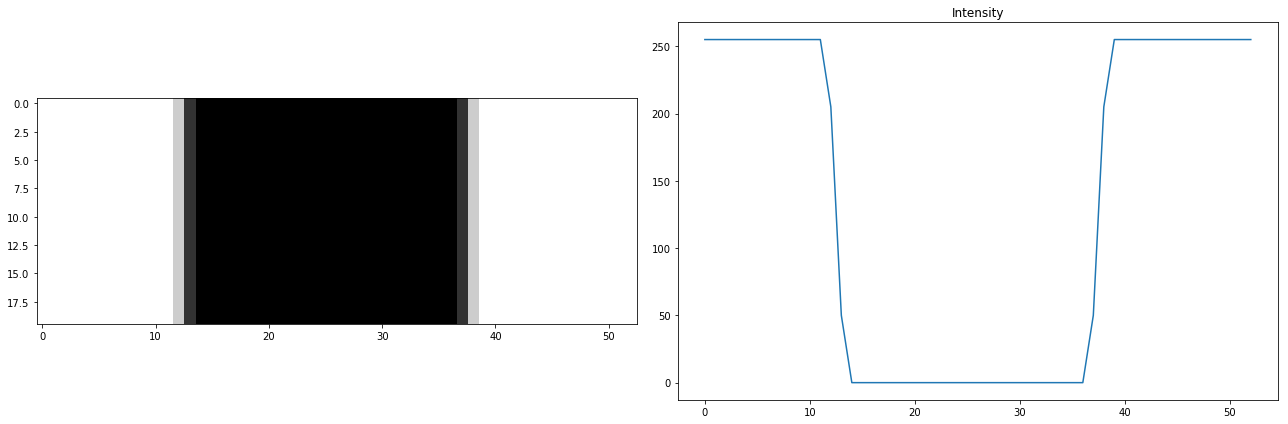

In [245]:
fig = plt.figure(figsize=(18,6))

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax2.set_title('Intensity')

checker = rgb2gray(data.checkerboard())[0:20, 12:65]

ax1.imshow(checker, plt.cm.gray)
ax2.plot(checker[10, :])

plt.tight_layout()
plt.show()

## Calculating the edges

Derivative of the intensity function reveals the edges.

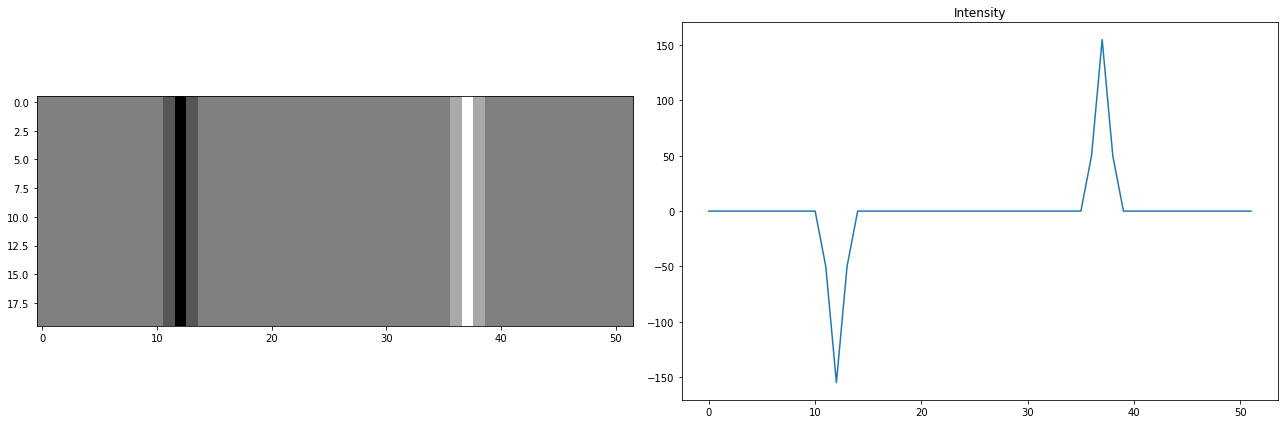

In [246]:
fig = plt.figure(figsize=(18,6))

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

checker_intensity_derivative = np.diff(checker[10,:] - len(checker) / 2)
checker_derivative = np.diff(checker - len(checker) / 2)

ax1.imshow(checker_derivative, plt.cm.gray)
ax2.plot(checker_intensity_derivative)
ax2.set_title('Intensity')

plt.tight_layout()
plt.show()

## Applying operator to find the peaks in the derivative

Steps:
- **Differential operators:** When applied to an image returns some derivatives.

- Model these **operators** as **masks/kernels** that compute the image gradient function.

- Threshold this **gradient** function to select the edge pixels.

## What is a Gradient ?

Gradient of a function is the direction of most rapid increase in intensity, and magnitute of that vector is how much it is changing as
a function of a unit step in that direction.

The gradient of an image:
$$\Delta f = \begin{bmatrix}
                 \partial{f} \over \partial{x} \\
                 \partial{f} \over \partial{y}
            \end{bmatrix}$$
            
The gradient direction is given by:
$$\theta = \tan^{-1}({\partial f \over \partial y} / {\partial f \over \partial x})$$

The magnitute of change if gradient:
$$\sqrt{\partial x^2 + \partial y^2}$$

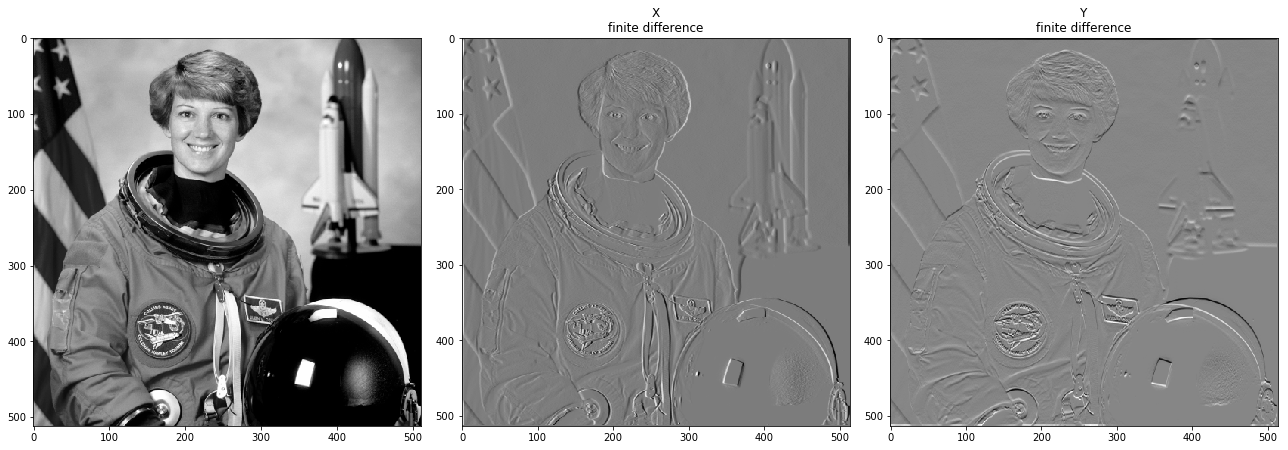

In [247]:
fig = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)

astronaut = rgb2gray(data.astronaut())
ax1.imshow(astronaut, plt.cm.gray)

# operators to calculate gradient is the
# averaged . version of:
#    [[0,  0],
#     [-1, 1],
#     [0,  0]]
kernel_x = np.array([
    [0,    0, 0  ],
    [-0.5, 0, 0.5],
    [0,    0, 0  ]
])
kernel_y = np.rot90(kernel_x)

diff_x = correlate2d(astronaut, kernel_x)
ax2.imshow(diff_x, plt.cm.gray)
ax2.set_title('X\nfinite difference')

diff_y = correlate2d(astronaut, kernel_y)
ax3.imshow(diff_y, plt.cm.gray)
ax3.set_title('Y\nfinite difference')

plt.tight_layout()
plt.show()

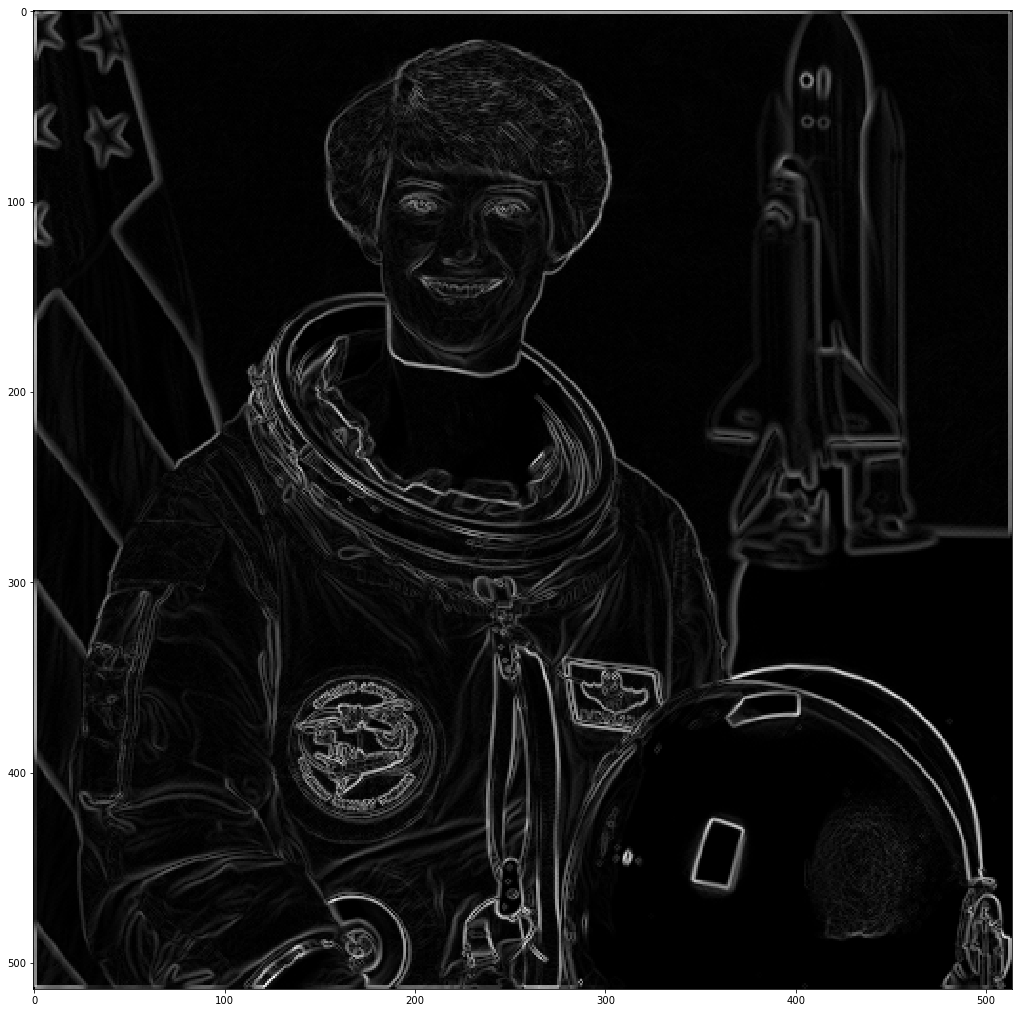

In [248]:
fig = plt.figure(figsize=(18, 18))
ax = plt.subplot(1,1,1)

# Calculating the magnitute from two gradients
# will give the edge image
edge_image = np.sqrt(np.square(diff_x) + np.square(diff_y))

ax.imshow(edge_image, plt.cm.gray)
plt.show()

## Canny Edge Operator and Derivative of Gaussian Filter 

When detecting edges in wild, noise should be reduced. Instead of first
applying smoothing operator and then applying derivative kernel to the
image, derivative of the gaussian filter could be applyed to the image
and yield the same result while saving an operation.

Because:

$$({I \oplus g}) \oplus h = I \oplus ({g \oplus h_x})$$



### Canny Edge Operator
1. Filter image with derivative of gaussian
2. Find magnitude and orientation of gradient
3. Non-maximum suppression:
    - Thin multi-pixel wide "ridges" down to single
    pixel witdh
4. Linking and thresholding (hysteresis):
    - Define two thresholds: low and high
    - Use the high threshold to start edge curves
    and the low threshold to continue them

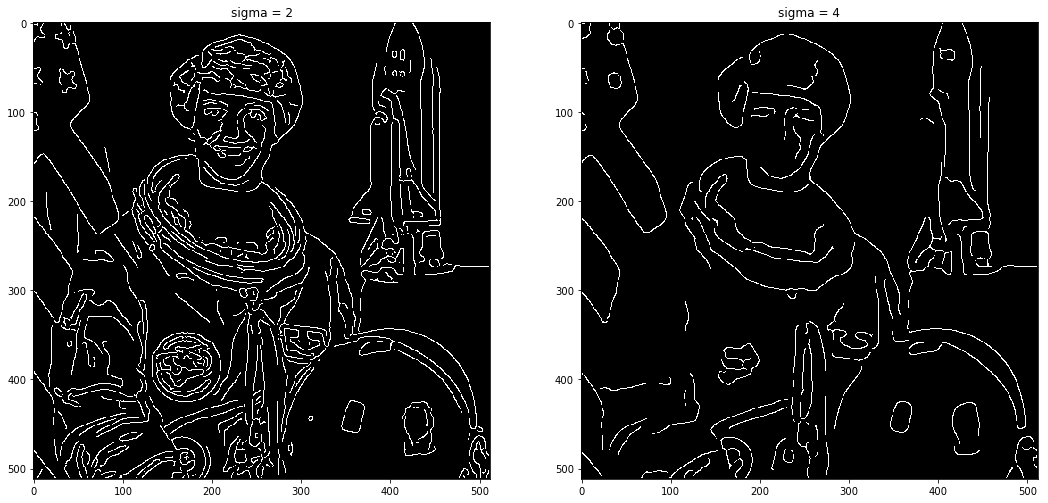

In [250]:
fig = plt.figure(figsize=(18,9))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

sigma = 2 # sigma value for gaussian filter
ax1.imshow(canny(astronaut, sigma=sigma), plt.cm.gray)
ax1.set_title('sigma = %d' % sigma)

sigma = 4
ax2.imshow(canny(astronaut, sigma=sigma), plt.cm.gray)
ax2.set_title('sigma = %d' % sigma)

plt.show()

### Derivative of Gaussian Filter - 2D

In 2D, there are 2 possible derivatives of gaussian:
- Partial of $X$ in respect to $Y$
- Partial of $Y$ in respect to $X$

The answer for **"Which one to use ?"** is using **Laplacian** operator:
$$\triangledown^2{h}={{\partial^2{f}} \over {\partial{x^2}}} + {{\partial^2{f}} \over {\partial{y^2}}}$$